In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [149]:
#read in Boston 2018 weather csv
weather_csv_path = "Resources/2018weather.csv"

weather_df = pd.read_csv(weather_csv_path)
weather_df.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG
0,USW00014739,"BOSTON, MA US",1/1/18,16.33,0.00,0.0,6
1,USW00014739,"BOSTON, MA US",1/2/18,12.75,0.00,0.0,10
2,USW00014739,"BOSTON, MA US",1/3/18,9.40,0.00,0.0,21
3,USW00014739,"BOSTON, MA US",1/4/18,22.59,1.35,13.4,26
4,USW00014739,"BOSTON, MA US",1/5/18,24.83,0.00,0.0,18


In [150]:
#count and check for any missing values
weather_df.count()

STATION    365
NAME       365
DATE       365
AWND       365
PRCP       365
SNOW       365
TAVG       365
dtype: int64

In [151]:
#view columns
weather_df.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'SNOW', 'TAVG'], dtype='object')

In [152]:
#create new df with only the following columns
reduced_weather_df = weather_df.loc[:, ["DATE", "AWND", "PRCP", "SNOW", "TAVG"]]
reduced_weather_df.head()

,DATE,AWND,PRCP,SNOW,TAVG
0,1/1/18,16.33,0.00,0.0,6
1,1/2/18,12.75,0.00,0.0,10
2,1/3/18,9.40,0.00,0.0,21
3,1/4/18,22.59,1.35,13.4,26
4,1/5/18,24.83,0.00,0.0,18


In [153]:
#rename columns
reduced_weather_df = reduced_weather_df.rename(columns={"DATE": "Date",
                                                        "AWND": "Average Wind Speed",
                                                       "PRCP": "Precipitation",
                                                        "SNOW": "Snow",
                                                       "TAVG": "Average Temperature"})
reduced_weather_df.columns

Index(['Date', 'Average Wind Speed', 'Precipitation', 'Snow',
       'Average Temperature'],
      dtype='object')

In [154]:
reduced_weather_df.head()

,Date,Average Wind Speed,Precipitation,Snow,Average Temperature
0,1/1/18,16.33,0.00,0.0,6
1,1/2/18,12.75,0.00,0.0,10
2,1/3/18,9.40,0.00,0.0,21
3,1/4/18,22.59,1.35,13.4,26
4,1/5/18,24.83,0.00,0.0,18


In [155]:
reduced_weather_df.dtypes

Date                    object
Average Wind Speed     float64
Precipitation          float64
Snow                   float64
Average Temperature      int64
dtype: object

In [156]:
# #set x axis and tick location
# x_axis = np.arange(len(reduced_weather_df))
# tick_locations = [value for value in x_axis]

In [157]:
# plt.bar(reduced_weather_df[:30]["Date"], reduced_weather_df[:30]["Snow"])
# plt.tight_layout()
# plt.xticks(rotation='vertical')

In [158]:
#convert to monthly
# reduced_weather_df.set_index("Date", inplace = True)
# reduced_weather_df.index = pd.to_datetime(reduced_weather_df.index)
# reduced_weather_df.resample('1M').mean()
# reduced_weather_df = reduced_weather_df.reset_index()

In [159]:
#reduced_weather_df.columns

In [160]:
#creat new columns for year, month, day
reduced_weather_df.reset_index()
reduced_weather_df["Date_Time"] = pd.to_datetime(reduced_weather_df["Date"])
reduced_weather_df["Year"] = reduced_weather_df["Date_Time"].dt.year
reduced_weather_df["Month"] = reduced_weather_df["Date_Time"].dt.month
reduced_weather_df["Day"] = reduced_weather_df["Date_Time"].dt.day
reduced_weather_df

,Date,Average Wind Speed,Precipitation,Snow,Average Temperature,Date_Time,Year,Month,Day
0,1/1/18,16.33,0.00,0.0,6,2018-01-01,2018,1,1
1,1/2/18,12.75,0.00,0.0,10,2018-01-02,2018,1,2
2,1/3/18,9.40,0.00,0.0,21,2018-01-03,2018,1,3
3,1/4/18,22.59,1.35,13.4,26,2018-01-04,2018,1,4
4,1/5/18,24.83,0.00,0.0,18,2018-01-05,2018,1,5
...,...,...,...,...,...,...,...,...,...
360,12/27/18,9.17,0.00,0.0,34,2018-12-27,2018,12,27
361,12/28/18,11.41,0.33,0.0,41,2018-12-28,2018,12,28
362,12/29/18,13.20,0.00,0.0,49,2018-12-29,2018,12,29
363,12/30/18,6.26,0.00,0.0,32,2018-12-30,2018,12,30


In [161]:
#group by month 
group_month_df = reduced_weather_df.groupby(["Month"]).mean()
group_month_df
group_month_df = group_month_df.reset_index()
group_month_df

,Month,Average Wind Speed,Precipitation,Snow,Average Temperature,Year,Day
0,1,13.327742,0.158710,0.574194,28.580645,2018.0,16.0
1,2,11.081071,0.134643,0.296429,38.107143,2018.0,14.5
2,3,15.089032,0.163548,0.751613,36.741935,2018.0,16.0
3,4,11.938333,0.154000,0.043333,44.700000,2018.0,15.5
4,5,10.001613,0.061290,0.000000,60.870968,2018.0,16.0
5,6,10.253333,0.098667,0.000000,67.366667,2018.0,15.5
6,7,9.870968,0.146774,0.000000,75.870968,2018.0,16.0
7,8,9.466129,0.150000,0.000000,76.935484,2018.0,16.0
8,9,9.656333,0.170667,0.000000,68.366667,2018.0,15.5
9,10,11.206452,0.121935,0.000000,54.258065,2018.0,16.0


In [162]:
#bar graph of monthly snow
# group_month_df.plot.bar(y = 'Snow')


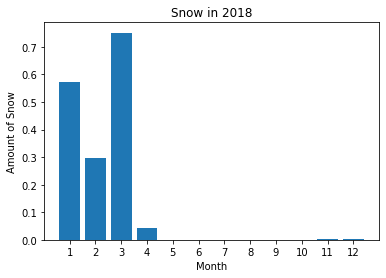

In [163]:
#create a bar chart for monthly snow fall
plt.bar(group_month_df["Month"], group_month_df["Snow"])
plt.title("Snow in 2018")
plt.ylabel("Amount of Snow")
plt.xlabel("Month")
plt.xticks(np.arange(1, 12+1, 1.0))
plt.show()

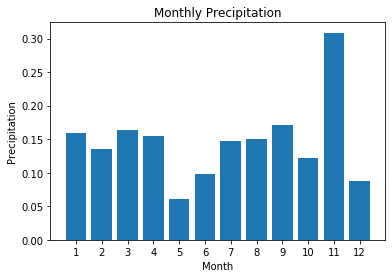

In [164]:
#create bar chart for monthly precipitation
plt.bar(group_month_df["Month"], group_month_df["Precipitation"])
plt.title("Monthly Precipitation")
plt.ylabel("Precipitation")
plt.xlabel("Month")
plt.xticks(np.arange(1, 12+1, 1.0))
plt.show()

In [165]:
#import customer satisfaction CSVs
csat_files = ["Resources/csat_result_2018_01_Jan.csv",
             "Resources/csat_result_2018_02_Feb.csv",
             "Resources/csat_result_2018_03_Mar.csv",
             "Resources/csat_result_2018_04_Apr.csv",
             "Resources/csat_result_2018_05_May.csv",
             "Resources/csat_result_2018_06_Jun.csv",
             "Resources/csat_result_2018_07_Jul.csv",
             "Resources/csat_result_2018_08_Aug.csv",
             "Resources/csat_result_2018_09_Sep.csv",
             "Resources/csat_result_2018_10_Oct.csv",
             "Resources/csat_result_2018_11_Nov.csv",
             "Resources/csat_result_2018_12_Dec.csv"]

final_csat_df = pd.DataFrame({})

#loop to import and merge CSVs into df
for file in csat_files:
    tmp = pd.read_csv(file)
    final_csat_df = final_csat_df.append(tmp)
    
final_csat_df

,survey_id,survey_date,survey_name,question_description,response_total,response_1_text,response_1_percent,response_2_text,response_2_percent,response_3_text,response_3_percent,response_4_text,response_4_percent,response_5_text,response_5_percent,response_6_text,response_6_percent,response_7_text,response_7_percent
0,500,2018-01-01,MBTA Customer Opinion Panel,How would you rate the mbta overall?,895,Extremely Dissatisfied,0.0922,Very Dissatisfied,0.0922,Somewhat Dissatisfied,0.1379,Neutral,0.0820,Somewhat Satisfied,0.2062,Very Satisfied,0.2920,Extremely Satisfied,0.0452
1,501,2018-01-01,MBTA Customer Opinion Panel,How would you rate your most recent trip?,886,Extremely Dissatisfied,0.1247,Very Dissatisfied,0.1247,Somewhat Dissatisfied,0.1027,Neutral,0.1025,Somewhat Satisfied,0.1444,Very Satisfied,0.3455,Extremely Satisfied,0.0878
2,502,2018-01-01,MBTA Customer Opinion Panel,How likely are you to continue using the mbta ...,884,Extremely Unlikely,0.0111,Very Unlikely,0.0111,Somewhat Unlikely,0.0171,Neither Likely nor Unlikely,0.0373,Somewhat Likely,0.0666,Very Likely,0.2036,Extremely Likely,0.6540
3,503,2018-01-01,MBTA Customer Opinion Panel,How likely are you to recommend the mbta to a ...,883,Extremely Unlikely,0.0944,Very Unlikely,0.0944,Somewhat Unlikely,0.0764,Neither Likely nor Unlikely,0.1516,Somewhat Likely,0.1811,Very Likely,0.1946,Extremely Likely,0.2432
4,504,2018-01-01,MBTA Customer Opinion Panel,The mbta provides reliable public transportati...,883,Strongly Disagree,0.2048,Disagree,0.2048,Slightly Disagree,0.1567,Neither Agree nor Disagree,0.1157,Slightly Agree,0.2078,Agree,0.1688,Strongly Agree,0.0245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,1241,2018-12-01,MBTA Customer Opinion Panel,How satisfied are you with the MBTA's communic...,1300,Extremely Dissatisfied,0.0583,Very Dissatisfied,0.0583,Somewhat Dissatisfied,0.1138,Neutral,0.1224,Somewhat Satisfied,0.2815,Very Satisfied,0.2642,Extremely Satisfied,0.0466
4,1279,2018-12-01,MBTA Customer Opinion Panel,How would you rate the mbta overall?,1300,Extremely Dissatisfied,0.0591,Very Dissatisfied,0.0591,Somewhat Dissatisfied,0.1164,Neutral,0.0863,Somewhat Satisfied,0.2691,Very Satisfied,0.3302,Extremely Satisfied,0.0362
5,1280,2018-12-01,MBTA Customer Opinion Panel,How would you rate your most recent trip?,1293,Extremely Dissatisfied,0.0496,Very Dissatisfied,0.0496,Somewhat Dissatisfied,0.0983,Neutral,0.1003,Somewhat Satisfied,0.1553,Very Satisfied,0.4219,Extremely Satisfied,0.1105
6,1281,2018-12-01,MBTA Customer Opinion Panel,The mbta provides reliable public transportati...,1290,Strongly Disagree,0.1054,Disagree,0.1054,Slightly Disagree,0.1665,Neither Agree nor Disagree,0.1062,Slightly Agree,0.2877,Agree,0.1896,Strongly Agree,0.0261


In [166]:
del final_csat_df["survey_id"]
final_csat_df = final_csat_df.drop_duplicates()
final_csat_df

,survey_date,survey_name,question_description,response_total,response_1_text,response_1_percent,response_2_text,response_2_percent,response_3_text,response_3_percent,response_4_text,response_4_percent,response_5_text,response_5_percent,response_6_text,response_6_percent,response_7_text,response_7_percent
0,2018-01-01,MBTA Customer Opinion Panel,How would you rate the mbta overall?,895,Extremely Dissatisfied,0.0922,Very Dissatisfied,0.0922,Somewhat Dissatisfied,0.1379,Neutral,0.0820,Somewhat Satisfied,0.2062,Very Satisfied,0.2920,Extremely Satisfied,0.0452
1,2018-01-01,MBTA Customer Opinion Panel,How would you rate your most recent trip?,886,Extremely Dissatisfied,0.1247,Very Dissatisfied,0.1247,Somewhat Dissatisfied,0.1027,Neutral,0.1025,Somewhat Satisfied,0.1444,Very Satisfied,0.3455,Extremely Satisfied,0.0878
2,2018-01-01,MBTA Customer Opinion Panel,How likely are you to continue using the mbta ...,884,Extremely Unlikely,0.0111,Very Unlikely,0.0111,Somewhat Unlikely,0.0171,Neither Likely nor Unlikely,0.0373,Somewhat Likely,0.0666,Very Likely,0.2036,Extremely Likely,0.6540
3,2018-01-01,MBTA Customer Opinion Panel,How likely are you to recommend the mbta to a ...,883,Extremely Unlikely,0.0944,Very Unlikely,0.0944,Somewhat Unlikely,0.0764,Neither Likely nor Unlikely,0.1516,Somewhat Likely,0.1811,Very Likely,0.1946,Extremely Likely,0.2432
4,2018-01-01,MBTA Customer Opinion Panel,The mbta provides reliable public transportati...,883,Strongly Disagree,0.2048,Disagree,0.2048,Slightly Disagree,0.1567,Neither Agree nor Disagree,0.1157,Slightly Agree,0.2078,Agree,0.1688,Strongly Agree,0.0245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2018-11-01,MBTA Customer Opinion Panel,How satisfied are you with the MBTA's communic...,1391,Extremely Dissatisfied,0.0551,Very Dissatisfied,0.0551,Somewhat Dissatisfied,0.1160,Neutral,0.1348,Somewhat Satisfied,0.2896,Very Satisfied,0.2704,Extremely Satisfied,0.0489
0,2018-12-01,MBTA Customer Opinion Panel,How would you rate the mbta overall?,1300,Extremely Dissatisfied,0.0591,Very Dissatisfied,0.0591,Somewhat Dissatisfied,0.1164,Neutral,0.0863,Somewhat Satisfied,0.2691,Very Satisfied,0.3302,Extremely Satisfied,0.0362
1,2018-12-01,MBTA Customer Opinion Panel,How would you rate your most recent trip?,1293,Extremely Dissatisfied,0.0496,Very Dissatisfied,0.0496,Somewhat Dissatisfied,0.0983,Neutral,0.1003,Somewhat Satisfied,0.1553,Very Satisfied,0.4219,Extremely Satisfied,0.1105
2,2018-12-01,MBTA Customer Opinion Panel,The mbta provides reliable public transportati...,1290,Strongly Disagree,0.1054,Disagree,0.1054,Slightly Disagree,0.1665,Neither Agree nor Disagree,0.1062,Slightly Agree,0.2877,Agree,0.1896,Strongly Agree,0.0261


In [167]:

#count to check for any missing values
final_csat_df.count()

survey_date             132
survey_name             132
question_description    126
response_total          132
response_1_text         132
response_1_percent      132
response_2_text         132
response_2_percent      132
response_3_text         132
response_3_percent      132
response_4_text         132
response_4_percent      132
response_5_text         132
response_5_percent      132
response_6_text         132
response_6_percent      132
response_7_text         132
response_7_percent      132
dtype: int64

In [168]:
#drop null values
final_csat_df = final_csat_df.dropna(how='any')
final_csat_df.count()

survey_date             126
survey_name             126
question_description    126
response_total          126
response_1_text         126
response_1_percent      126
response_2_text         126
response_2_percent      126
response_3_text         126
response_3_percent      126
response_4_text         126
response_4_percent      126
response_5_text         126
response_5_percent      126
response_6_text         126
response_6_percent      126
response_7_text         126
response_7_percent      126
dtype: int64

In [169]:
final_csat_df.columns

Index(['survey_date', 'survey_name', 'question_description', 'response_total',
       'response_1_text', 'response_1_percent', 'response_2_text',
       'response_2_percent', 'response_3_text', 'response_3_percent',
       'response_4_text', 'response_4_percent', 'response_5_text',
       'response_5_percent', 'response_6_text', 'response_6_percent',
       'response_7_text', 'response_7_percent'],
      dtype='object')

In [170]:
#rename columns so it looks cleaner
final_csat_df = final_csat_df.rename(columns={"survey_date": "Date",
                                             "question_description": "Question",
                                             "response_total": "Total Response",
                                             "response_1_text": "Response 1",
                                             "response_1_percent": "% Response 1",
                                             "response_2_text": "Response 2",
                                             "response_2_percent": "% Response 2",
                                             "response_3_text": "Response 3",
                                             "response_3_percent":"% Response 3",
                                             "response_4_text": "Response 4",
                                            "response_4_percent":"% Response 4",
                                             "response_5_text": "Response 5",
                                              "response_5_percent":"% Response 5",
                                             "response_6_text": "Response 6",
                                             "response_6_percent":"% Response 6",
                                             "response_7_text": "Response 7",
                                             "response_7_percent":"% Response 7"})

final_csat_df.head()

,Date,survey_name,Question,Total Response,Response 1,% Response 1,Response 2,% Response 2,Response 3,% Response 3,Response 4,% Response 4,Response 5,% Response 5,Response 6,% Response 6,Response 7,% Response 7
0,2018-01-01,MBTA Customer Opinion Panel,How would you rate the mbta overall?,895,Extremely Dissatisfied,0.0922,Very Dissatisfied,0.0922,Somewhat Dissatisfied,0.1379,Neutral,0.0820,Somewhat Satisfied,0.2062,Very Satisfied,0.2920,Extremely Satisfied,0.0452
1,2018-01-01,MBTA Customer Opinion Panel,How would you rate your most recent trip?,886,Extremely Dissatisfied,0.1247,Very Dissatisfied,0.1247,Somewhat Dissatisfied,0.1027,Neutral,0.1025,Somewhat Satisfied,0.1444,Very Satisfied,0.3455,Extremely Satisfied,0.0878
2,2018-01-01,MBTA Customer Opinion Panel,How likely are you to continue using the mbta ...,884,Extremely Unlikely,0.0111,Very Unlikely,0.0111,Somewhat Unlikely,0.0171,Neither Likely nor Unlikely,0.0373,Somewhat Likely,0.0666,Very Likely,0.2036,Extremely Likely,0.6540
3,2018-01-01,MBTA Customer Opinion Panel,How likely are you to recommend the mbta to a ...,883,Extremely Unlikely,0.0944,Very Unlikely,0.0944,Somewhat Unlikely,0.0764,Neither Likely nor Unlikely,0.1516,Somewhat Likely,0.1811,Very Likely,0.1946,Extremely Likely,0.2432
4,2018-01-01,MBTA Customer Opinion Panel,The mbta provides reliable public transportati...,883,Strongly Disagree,0.2048,Disagree,0.2048,Slightly Disagree,0.1567,Neither Agree nor Disagree,0.1157,Slightly Agree,0.2078,Agree,0.1688,Strongly Agree,0.0245


In [171]:
#melt data together based on response text
df_text = final_csat_df[['Date','Question','Total Response','Response 1','Response 2','Response 3','Response 4','Response 5', 'Response 6','Response 7']]
df_text_long = df_text.melt(id_vars=['Date','Question','Total Response']).sort_values('Date')
df_text_long.head(20)

,Date,Question,Total Response,variable,value
0,2018-01-01,How would you rate the mbta overall?,895,Response 1,Extremely Dissatisfied
138,2018-01-01,Vehicle cleanliness,879,Response 2,Very Poor
139,2018-01-01,Speed/travel time,885,Response 2,Very Poor
140,2018-01-01,Parking availability,278,Response 2,Very Poor
141,2018-01-01,Real-time communications,833,Response 2,Very Poor
142,2018-01-01,How satisfied are you with the MBTA's communic...,895,Response 2,Very Dissatisfied
261,2018-01-01,Wait time at stop,884,Response 3,Poor
260,2018-01-01,The mbta has a fleet of trains and buses that ...,882,Response 3,Slightly Disagree
259,2018-01-01,The mbta is a good value for the money.,883,Response 3,Slightly Disagree
258,2018-01-01,The mbta uses technology to meet the needs and...,883,Response 3,Slightly Disagree


In [172]:
#melt data together based on response %
df_percentage = final_csat_df[['Date','Question','Total Response','% Response 1','% Response 2','% Response 3','% Response 4','% Response 5', '% Response 6','% Response 7']]
#match columns from both dfs
df_percentage.columns = df_text.columns
df_percentage_long = df_percentage.melt(id_vars=['Date','Question','Total Response']).sort_values('Date')
df_percentage_long.head(20)

,Date,Question,Total Response,variable,value
0,2018-01-01,How would you rate the mbta overall?,895,Response 1,0.0922
138,2018-01-01,Vehicle cleanliness,879,Response 2,0.0456
139,2018-01-01,Speed/travel time,885,Response 2,0.1114
140,2018-01-01,Parking availability,278,Response 2,0.1255
141,2018-01-01,Real-time communications,833,Response 2,0.1352
142,2018-01-01,How satisfied are you with the MBTA's communic...,895,Response 2,0.0914
261,2018-01-01,Wait time at stop,884,Response 3,0.1141
260,2018-01-01,The mbta has a fleet of trains and buses that ...,882,Response 3,0.1473
259,2018-01-01,The mbta is a good value for the money.,883,Response 3,0.1057
258,2018-01-01,The mbta uses technology to meet the needs and...,883,Response 3,0.1244


In [173]:
#merge melted dfs
merged_df = pd.merge(df_text_long, df_percentage_long, on = ('Date','Question','Total Response','variable'))
#sort by survey id and variable
merged_df = merged_df.sort_values(['Date', 'variable'])
merged_df = merged_df.rename(columns={
                                      "value_x": "Response Value",
                                     "value_y": "Response %"})
merged_df.head(20)

,Date,Question,Total Response,variable,Response Value,Response %
0,2018-01-01,How would you rate the mbta overall?,895,Response 1,Extremely Dissatisfied,0.0922
74,2018-01-01,How satisfied are you with the MBTA's communic...,895,Response 1,Extremely Dissatisfied,0.0914
75,2018-01-01,Real-time communications,833,Response 1,Unacceptable,0.1352
76,2018-01-01,Parking availability,278,Response 1,Unacceptable,0.1255
77,2018-01-01,Speed/travel time,885,Response 1,Unacceptable,0.1114
79,2018-01-01,Vehicle cleanliness,879,Response 1,Unacceptable,0.0456
80,2018-01-01,Stop condition &amp; cleanliness,869,Response 1,Unacceptable,0.0549
81,2018-01-01,Wait time at stop,884,Response 1,Unacceptable,0.1226
82,2018-01-01,The mbta has a fleet of trains and buses that ...,882,Response 1,Strongly Disagree,0.1873
83,2018-01-01,The mbta is a good value for the money.,883,Response 1,Strongly Disagree,0.1138


In [176]:
#only "How would you rate the mbta overall?"
# only_overall_rate_df = merged_df.loc[merged_df["Question"] == "How would you rate the mbta overall?", :].reset_index(drop = True)
only_overall_rate_df = merged_df
#number of responses per value
only_overall_rate_df["Number of Responses"] = only_overall_rate_df["Total Response"]*only_overall_rate_df["Response %"]
#get rating column
only_overall_rate_df["Response Rating"] = only_overall_rate_df["variable"].str.replace("Response ", "").astype(int)
# only_overall_rate_df["Average Rating"] = np.average(only_overall_rate_df["Response Rating"], weights=only_overall_rate_df["Number of Responses"])
only_overall_rate_df["Weighted Rating"] = only_overall_rate_df["Response Rating"]*only_overall_rate_df["Number of Responses"]

only_overall_rate_df.head(20)

,Date,Question,Total Response,variable,Response Value,Response %,Number of Responses,Response Rating,Weighted Rating
0,2018-01-01,How would you rate the mbta overall?,895,Response 1,Extremely Dissatisfied,0.0922,82.5190,1,82.5190
74,2018-01-01,How satisfied are you with the MBTA's communic...,895,Response 1,Extremely Dissatisfied,0.0914,81.8030,1,81.8030
75,2018-01-01,Real-time communications,833,Response 1,Unacceptable,0.1352,112.6216,1,112.6216
76,2018-01-01,Parking availability,278,Response 1,Unacceptable,0.1255,34.8890,1,34.8890
77,2018-01-01,Speed/travel time,885,Response 1,Unacceptable,0.1114,98.5890,1,98.5890
79,2018-01-01,Vehicle cleanliness,879,Response 1,Unacceptable,0.0456,40.0824,1,40.0824
80,2018-01-01,Stop condition &amp; cleanliness,869,Response 1,Unacceptable,0.0549,47.7081,1,47.7081
81,2018-01-01,Wait time at stop,884,Response 1,Unacceptable,0.1226,108.3784,1,108.3784
82,2018-01-01,The mbta has a fleet of trains and buses that ...,882,Response 1,Strongly Disagree,0.1873,165.1986,1,165.1986
83,2018-01-01,The mbta is a good value for the money.,883,Response 1,Strongly Disagree,0.1138,100.4854,1,100.4854


In [177]:
sum_df = only_overall_rate_df[["Date", "Question", "Total Response", "Weighted Rating"]].groupby(["Date", "Question", "Total Response"])
responses_sum = sum_df.sum().reset_index()
responses_sum["Weighted Average"] = responses_sum["Weighted Rating"]/responses_sum["Total Response"]

responses_sum.head(20)

,Date,Question,Total Response,Weighted Rating,Weighted Average
0,2018-01-01,How likely are you to continue using the mbta ...,884,5627.897600,6.3664
1,2018-01-01,How likely are you to recommend the mbta to a ...,883,4321.666900,4.8943
2,2018-01-01,How satisfied are you with the MBTA's communic...,895,3706.284500,4.1411
3,2018-01-01,How would you rate the mbta overall?,895,3685.341500,4.1177
4,2018-01-01,How would you rate your most recent trip?,886,3988.594800,4.5018
5,2018-01-01,Parking availability,278,1261.286000,4.5370
6,2018-01-01,Real-time communications,833,3638.294100,4.3677
7,2018-01-01,Speed/travel time,885,4092.594000,4.6244
8,2018-01-01,Stop condition &amp; cleanliness,869,3992.968100,4.5949
9,2018-01-01,The mbta has a fleet of trains and buses that ...,882,3087.352800,3.5004
